# 05_TransferLearningFeatureExtraction_MobileNetV1 (Testing)

Written by: Rupesh Kumar Dey

Notebook used for model testing for Transfer Learning Models with Feature Extraction (no tuning) - MobileNetV1

## Importing required Libraries

In [1]:
!pip install seaborn
!pip install tensorflow_hub

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - Feature Extraction MobileNetV1 (Testing)

### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

2022-08-31 12:24:43.150106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 12:24:43.197967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 12:24:43.198511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 12:24:43.200141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 12:24:43.200529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

17235968/17225924 [==============================] - 0s 0us/step


2022-08-31 12:24:47.726025: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


1200/1200 [==============================] - 15s 10ms/step
Confusion Matrix:


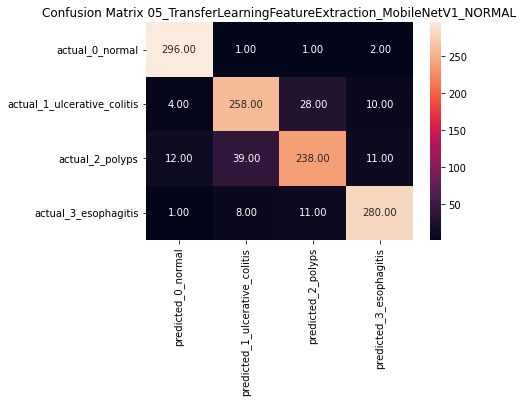

In [5]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_TEST.jpg")
saveResults_csv(df_results,"TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_TEST.csv")

### 05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE: Transfer Learning with MobileNetV1 model on CLAHE Image

#### Dataset Loading 

In [6]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

1200/1200 [==============================] - 11s 8ms/step
Confusion Matrix:


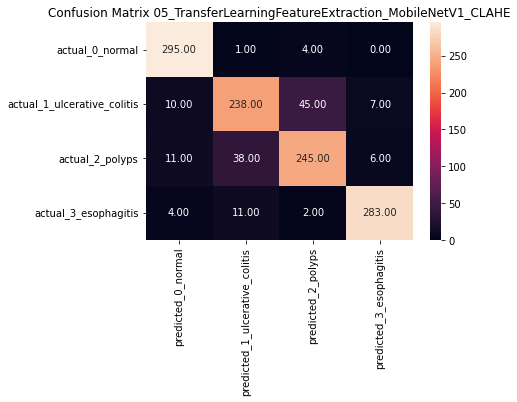

In [7]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_CLAHE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_CLAHE,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_CLAHE, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE_TEST.jpg")
saveResults_csv(df_results,"TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE_TEST.csv")

### 05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE: Transfer Learning with MobileNetV1 model on MULTISCALE Image

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

1200/1200 [==============================] - 10s 8ms/step
Confusion Matrix:


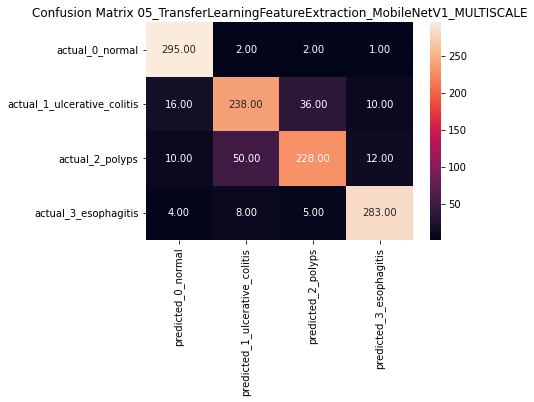

In [9]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE_TEST.jpg")
saveResults_csv(df_results,"TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE_TEST.csv")

### 05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH: Transfer Learning with MobileNetV1 model on RAYLEIGH Image

#### Dataset Loading 

In [10]:
# Defining path of dataset
train_path = "/Dataset/Dataset_RAYLEIGH/train"
test_path = "/Dataset/Dataset_RAYLEIGH/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

1200/1200 [==============================] - 9s 7ms/step
Confusion Matrix:


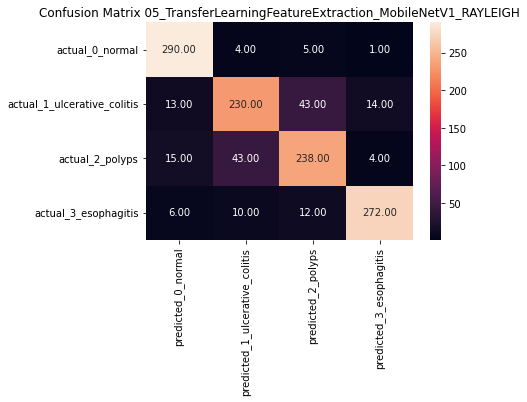

In [11]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH" ,
                                                                data_class = ["0_normal_RAYLEIGH",
                                                                              "1_ulcerative_colitis_RAYLEIGH",
                                                                              "2_polyps_RAYLEIGH",
                                                                              "3_esophagitis_RAYLEIGH"],
                                                                location = "TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH_TEST.jpg")
saveResults_csv(df_results,"TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH_TEST.csv")

### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - Adam)

#### Dataset Loading

In [12]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

1200/1200 [==============================] - 13s 10ms/step
Confusion Matrix:


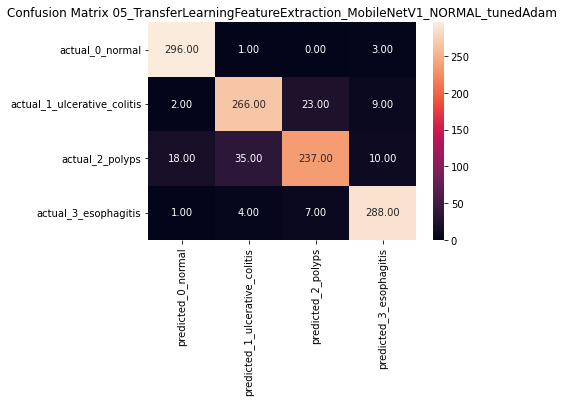

In [13]:
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.jpg")
saveResults_csv(df_results,"TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.csv")

### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - LrScheduler)

#### Dataset Loading

In [14]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

1200/1200 [==============================] - 13s 10ms/step
Confusion Matrix:


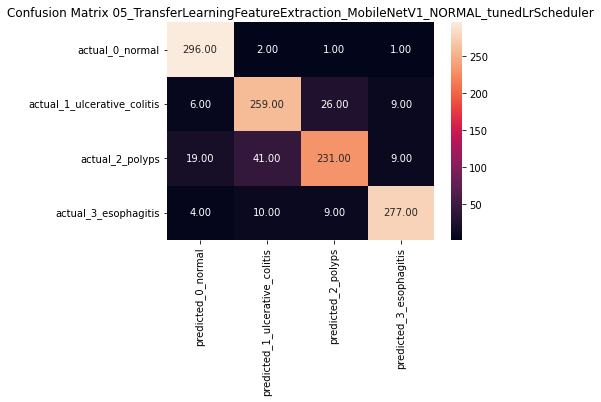

In [15]:
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.jpg")
saveResults_csv(df_results,"TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.csv")

### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

1200/1200 [==============================] - 12s 10ms/step
Confusion Matrix:


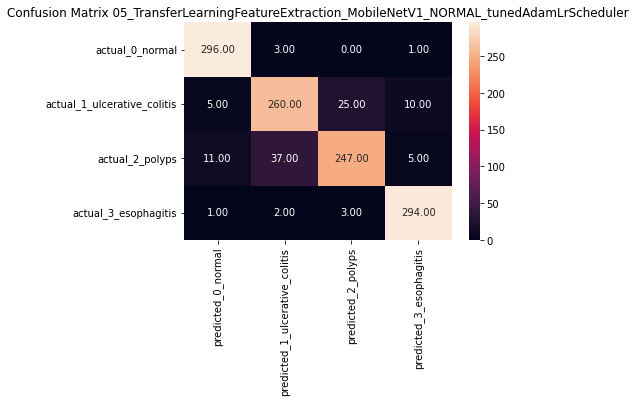

In [17]:
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")
saveResults_csv(df_results,"TestResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.csv")